In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
# from qiskit.providers.ibmq import least_busy
# from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
qc = QuantumCircuit(3)

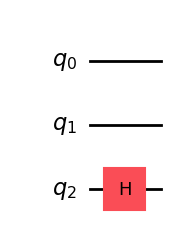

In [3]:
qc.h(2)
qc.draw('mpl')

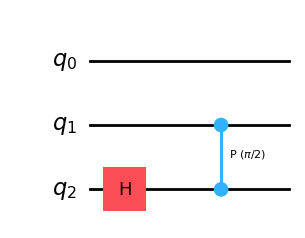

In [4]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw('mpl')

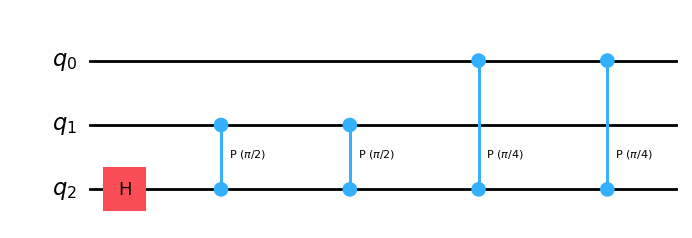

In [7]:
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw('mpl')

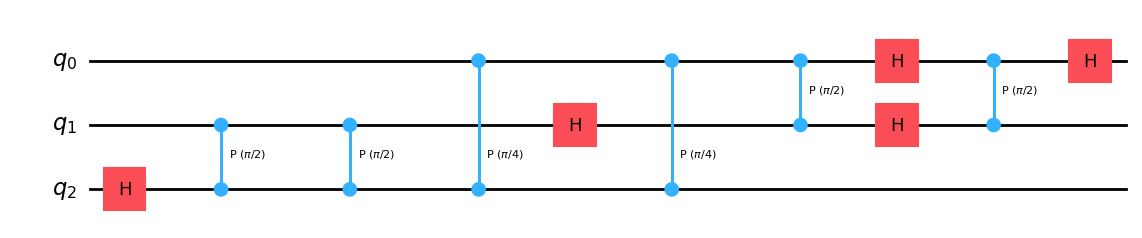

In [9]:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw('mpl')

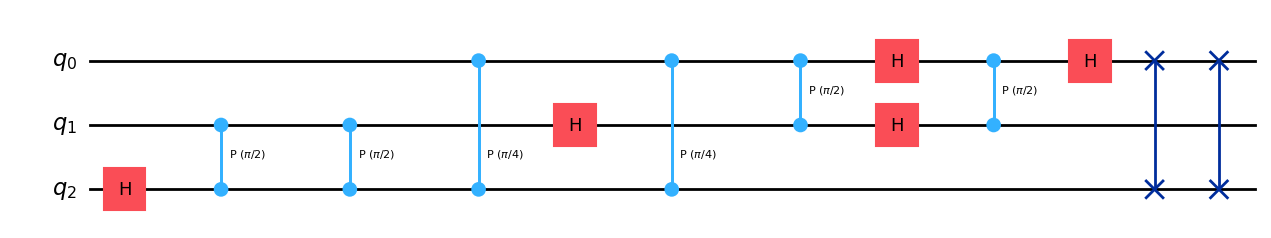

In [11]:
qc.swap(0,2)
qc.draw('mpl')

### 8.2 General QFT Function
We will now create a general circuit for the QFT in Qiskit. Creating large general circuits like this is really where Qiskit shines.

It is easier to build a circuit that implements the QFT with the qubits upside down, then swap them afterwards; we will start off by creating the function that rotates our qubits correctly. Let’s start as we did with the 3 qubit example, by correctly rotating the most significant qubit (the qubit with the highest index):

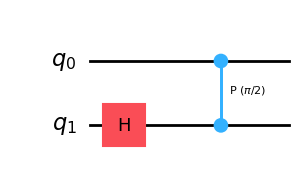

In [5]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

qc = QuantumCircuit(2)
qft_rotations(qc,2)
qc.draw('mpl')

In [45]:
# from qiskit_textbook.widgets import scalable_circuit
# scalable_circuit(qft_rotations)

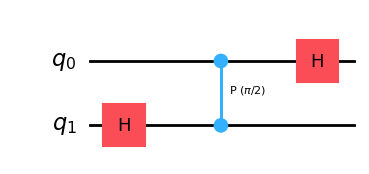

In [6]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(2)
qft_rotations(qc,2)
qc.draw('mpl')

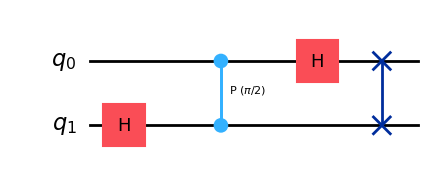

In [7]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(2)
qft(qc,2)
qc.draw('mpl')

Statevector([ 0.5-6.123234e-17j, -0.5+6.123234e-17j,  0.5-6.123234e-17j,
             -0.5+6.123234e-17j],
            dims=(2, 2))


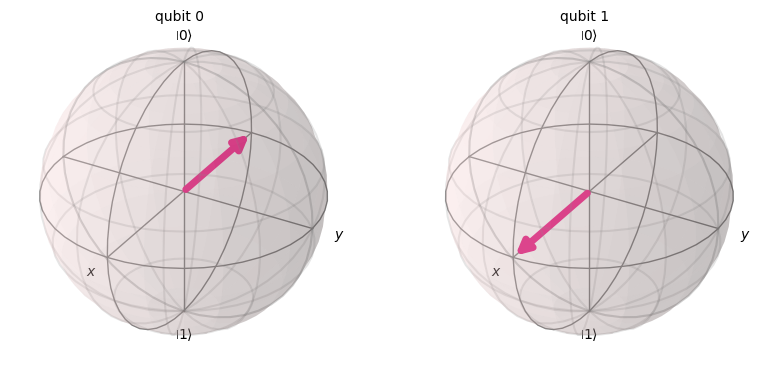

In [9]:
# Create the circuit
num_qubits = 2
qc = QuantumCircuit(num_qubits)

def encode_state(qc, state, num_qubits):
    # Convert the state to its binary representation
    binary_state = bin(state)[2:].zfill(num_qubits)  # convert state to binary and fill leading 0s
    
    # Apply X gates based on the binary representation
    for i, bit in enumerate(reversed(binary_state)):  # reverse to match qubit order (q0 as LSB)
        if bit == '1':
            qc.x(i)
            
# Encode a state automatically (e.g., state 5 which is '101' in binary)
state = 2
encode_state(qc, state, num_qubits)

qc.draw('mpl')

sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
# counts = sim.run(qc_init).result().get_counts()
# plot_histogram(counts)
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

qft(qc,num_qubits)
qc.draw('mpl')

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)
# counts = sim.run(qc_init).result().get_counts()
# plot_histogram(counts)